In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import ipywidgets as widgets
widgets.interact_manual.opts['manual_name'] = "Go!"

##################################################
## Constants 
##################################################
k   = 1.380649E-23  #Boltzmann Constant [J/K]
T   = 298.15        #Temperature [K]
e   = 1.60219E-19   #Proton charge [C]
epv = 8.854E-14     #Permittivity vacuum [C^2/cm·J]
epw = 80            #Relative perm of water at 25°C
A   = 6.02205E+23   #Avogadro's number [1/mol]

# **Problem #2**

>Please check a standalone version of this homework at:
>
>· (Voila version):  https://mybinder.org/v2/gh/edsaac/GouyChapman/master?urlpath=voila%2Frender%2FSaavedra_hw2_p1.ipynb
>
>[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/GouyChapman/master?urlpath=voila%2Frender%2FSaavedra_hw2_p1.ipynb)
>
>
>
>· (Classic notebook): https://mybinder.org/v2/gh/edsaac/GouyChapman/master?filepath=Saavedra_hw2_p1.ipynb
>
>[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/GouyChapman/master?filepath=Saavedra_hw2_p1.ipynb)

## **1. Gouy-Chapman Model**

First, some definitions before dealing with the Gouy-Chapman model. 

**Ionic Strength $I$**

\begin{equation}
    I = \dfrac{1}{2}\sum_\limits{i}{z_i^2c_i}
\end{equation}

In [2]:
def IonicStrenght(z,c):  #I in [mol/L]
    ElectroliteRatio   = np.ones(2)*z
    Salt_concentration = np.ones(2)*c
    return 0.5 * np.dot(z*z,c)

**Debby Lenght $\kappa$**

\begin{equation}
    \kappa^2 = \dfrac{2e^2I}{\varepsilon\varepsilon_0kT}
\end{equation}

In [3]:
def DebbyLenght(I):  #1/kappa in [cm]
    return 1/np.sqrt((e*e*2*I/1000*A)/(epw*epv*k*T)) 

**Electrolite Ratio**

Assuming that only one salt is dissolved in ure water, $z$ will be only a function of the electrolite ratio. For instance, for a solution of a 2:2 electrolite, $z_1=2$ and $z_2=-2$.


In [4]:
def ElectroliteRatio(Text):
    if "1:1" in Text:
        return 1.
    elif "2:2" in Text:
        return 2.
    elif "3:3" in Text:
        return 3.

### **1.1 Model for small potentials**

A potential is considered small if it is lower than 25mV. In that case, the following expression can be used to calculate the potential ($\psi$) as a function of the distance ($x$) to the charged surface:

\begin{equation}
    \psi(x) = \psi_0\exp{(-\kappa x)}
\end{equation}

Knowing this potential variation, the concentration $C_i$ of the ion $i$ coming from the electrolyte dissolution can be calculated:

\begin{equation}
    c_i(x) = c_{i,\infty} \exp{\left( - \dfrac{z_ie\psi}{kT}  \right)}
\end{equation}


In [5]:
##################################################
##  Gouy-Chapman Small potential 
##################################################
def GouySmallPot(X,I,si0,z,\
                 mode="Pot",\
                 con0=1E-3):          
    kappa = 1/(DebbyLenght(I)*1.0E7)    #in [1/nm]
    VAR1 = np.exp(-kappa*X)             #X in [nm]
    VAR2 = np.exp(-z*e*si0*VAR1/(k*T))  #si0 in [V]
    if "Pot" in mode:
        return si0*VAR1
    elif "Con" in mode:
        return con0*VAR2
    else:
        print("What")
        return 0

**Plotting $\psi(x)$**

The following piece of code plots the potential $\psi(x)$ and the cation/anion concentrations $c_i$ over $x$ following the expressions in section 1.1. Some parameters have to be specified initially:

- Electrolyte ratio: whether the dissolved salt is a 1:1, 2:2 or a 3:3 electrolyte
- Surface potential ($\psi_0$): the electrical potential on the surface where $x=0$
- Solution concentration ($c_\infty$): the bulk salt concentration in the solution

In [6]:
##################################################
##  Plotting things 
##################################################
def plotGouySmall(Potential,Electrolite_Ratio,SaltConc):
    
    SaltConc = 10**SaltConc
    Electrolite_Ratio = ElectroliteRatio(Electrolite_Ratio)
    
    # Calculate Ionic Strength
    Is = IonicStrenght(Electrolite_Ratio,SaltConc) #[mol/L]
    # Calculate Debye Lenght in nm
    Deb = DebbyLenght(Is)*1.0E+7

    X = np.linspace(0,85.,1000) #nm
    Surface_Potential =Potential/1000
    
    plt.figure(figsize=(8,10),facecolor="white")
    plt.subplot(2,1,1) # Subplot for potentials

    F1 = GouySmallPot(X,Is,Surface_Potential,Electrolite_Ratio,mode="Potential",)
    plt.plot(X,F1*1000,label="Simple Gouy-Chapman")

    # Other plot details
    suf = Surface_Potential*1000
    plt.title("Gouy-Chapman Model for small potentials",size=12,weight='bold')
    plt.ylabel("Potential (mV)",fontsize="large")
    plt.xlim([-9.,75.])
    plt.ylim([0,suf])
    plt.axvline(Deb,ls='dotted',label="Debye lenght = %.2f nm" % Deb)
    plt.axvspan(xmin=-10,xmax=0,alpha=0.2)
    plt.text(-4,suf/4,"Charged Surface",\
             fontdict={'weight':'bold','size':10},\
             rotation='vertical',rotation_mode='anchor')
    if abs(suf) > 25:
        danger = "This is not a\nsmall potential!"
        plt.text(55,suf/4,danger,ha='center',style='oblique',\
                 bbox=dict(boxstyle="round",ec='gray',fc='pink',alpha=0.5))
    plt.legend()

    #********************************************************
    plt.subplot(2,1,2) # Subplot for concentrations
    suf = SaltConc*1000 #mmol/L

    F11 = GouySmallPot(X,Is,Surface_Potential,z=+1,mode="Concentration",con0=suf)
    plt.plot(X,F11,label="Cation conc.")
    F12 = GouySmallPot(X,Is,Surface_Potential,z=-1,mode="Concentration",con0=suf)
    plt.plot(X,F12,label="Anion conc.")

    # Other plot details
    plt.xlim([-9.,75.])
    plt.ylim([0,suf*3])
    plt.axvline(Deb,ls='dotted')
    plt.axvspan(xmin=-10,xmax=0,alpha=0.2)
    plt.ylabel("Concentration (mmol/L)",fontsize="large")
    plt.xlabel("Distance (nm)",fontsize="large")
    plt.text(-4,suf/4,"Charged Surface",\
             fontdict={'weight':'bold','size':10},\
             rotation='vertical',rotation_mode='anchor')
    plt.legend()
    plt.show()


*Note: I've tried to use widgets in order to make the plot a little more easier to modify. If this worked correctly, you'll find a slider to set the surface potential $\psi_0$, another one for the bulk log-concentration of the electrolyte $c_\infty$ and a dropdown option to choose the electrolyte ratio. Once the parameters are set, the Go! button should show the resulting plot*

In [7]:
##################################################
##  Solution Characteristics 
##################################################
Pot   = widgets.IntSlider(description="Potential mV", min=-50, max=50, value=25, step=1)
zElec = widgets.Dropdown(description="Electrolite", options=["1:1","2:2","3:3"])
Scon  = widgets.FloatSlider(description="log[Salt] mM", min=-6, max=0, step=0.1, value = -3)

##################################################
##  Plot results - Small Potentials
##################################################
interact_manual(plotGouySmall,\
                Potential = Pot, Electrolite_Ratio=zElec,SaltConc=Scon);

interactive(children=(IntSlider(value=25, description='Potential mV', max=50, min=-50), Dropdown(description='…

*If the widgets above did not work, different values for those three parameters can be set in the piece of code below*

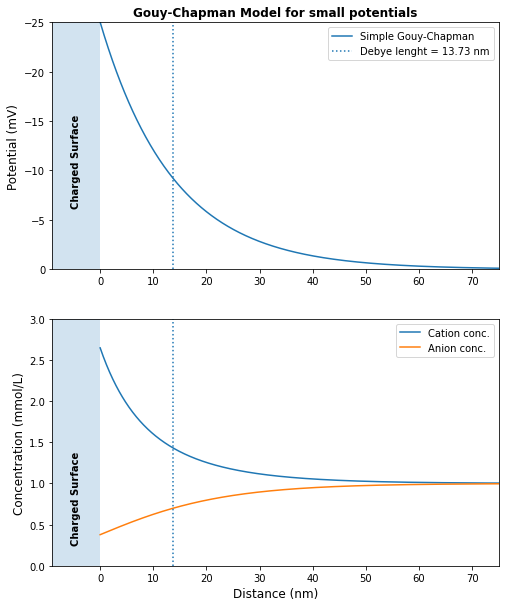

In [8]:
##################################################
##  Plot Manually 
##################################################
Surface__Potential  = -25 #mV
Electrolite__Ratio  = "1:1" #"2:2" or "3:3"
Salt__Concentration = -3 #log [mol/L]

plotGouySmall(Surface__Potential,Electrolite__Ratio,Salt__Concentration)

### **1.2 Model for higher potentials**

This approximation can be used for potentials higher than 25mV, however, we will be limited only to symetrical electrolytes. In this case, the following expression is used to calculate the potential ($\psi$) as a function of the distance ($x$) to the charged surface:

\begin{equation}
    \psi(x) = \dfrac{2kT}{ze}\ln\left( \dfrac{1+\exp(-\kappa x)\tanh(ze\psi_0/4kT)}{1-\exp(-\kappa x)\tanh(ze\psi_0/4kT)} \right)
\end{equation}

or,

\begin{equation}
    \tanh\left(\dfrac{ze\psi(x)}{4kT}\right) = \tanh\left(\dfrac{ze\psi_0}{4kT}\right) \exp{(-\kappa x)}
\end{equation}

or,

\begin{equation}
    \psi(x) = \dfrac{4kT}{ze}{\rm arctanh}\left(\tanh\left(\dfrac{ze\psi_0}{4kT}\right) \exp{(-\kappa x)}\right)
\end{equation}


As done before, the concentration $C_i$ of the ion $i$ coming from the electrolyte dissolution is calculated:

\begin{equation}
    c_i(x) = c_{i,\infty} \exp{\left( - \dfrac{z_ie\psi(x)}{kT}  \right)}
\end{equation}

As done before, the concentration $C_i$ of the ion $i$ coming from the electrolyte dissolution is calculated:

\begin{equation}
    c_i(x) = c_{i,\infty} \exp{\left( - \dfrac{z_ie\psi(x)}{kT}  \right)}
\end{equation}

In [9]:
##################################################",
##  Gouy-Chapman Big potential,
##################################################",
def GouyBigPotential(X,I,si0,z,\
                 mode="Pot",\
                 con0=1E-3):
    kappa = 1/(DebbyLenght(I)*1.0E7)    #in [1/nm]
    VAR1 = np.exp(-kappa*X)
    VAR2 = np.tanh((z*e*si0)/(4*k*T))
    VAR3 = np.arctanh(VAR2*VAR1)
    POT  = (4*k*T)/(z*e)*VAR3
    CON  = np.exp(-z*e*POT/(k*T))
    
    if "Pot" in mode:
        return POT
    elif "Con" in mode:
        return con0*CON
    else:
        print("What")
        return 0

In [10]:
##################################################
##  Plotting things 
##################################################
def plotGouyBig(Potential,Electrolite_Ratio,SaltConc):
    SaltConc = 10**SaltConc
    Electrolite_Ratio = ElectroliteRatio(Electrolite_Ratio)
    
    # Calculate Ionic Strength
    Is = IonicStrenght(Electrolite_Ratio,SaltConc) #[mol/L]
    # Calculate Debye Lenght in nm
    Deb = DebbyLenght(Is)*1.0E+7

    X = np.linspace(0,85.,1000) #nm
    Surface_Potential =Potential/1000
    
    plt.figure(figsize=(8,10),facecolor="white")
    plt.subplot(2,1,1) # Subplot for potentials

    F1 = GouyBigPotential(X,Is,Surface_Potential,Electrolite_Ratio,mode="Potential",)
    plt.plot(X,F1*1000,label="General Gouy-Chapman")

    # Other plot details
    suf = Surface_Potential*1000
    plt.title("Gouy-Chapman Model for ALL potentials",size=12,weight='bold')
    plt.ylabel("Potential (mV)",fontsize="large")
    plt.xlim([-9.,75.])
    plt.ylim([0,suf])
    plt.axvline(Deb,ls='dotted',label="Debye lenght = %.2f nm" % Deb)
    plt.axvspan(xmin=-10,xmax=0,alpha=0.2)
    plt.text(-4,suf/4,"Charged Surface",\
             fontdict={'weight':'bold','size':10},\
             rotation='vertical',rotation_mode='anchor')
    if abs(suf) > 25:
        danger = "Cool! Not a\nsmall potential!"
        plt.text(55,suf/4,danger,ha='center',style='oblique',\
                 bbox=dict(boxstyle="round",ec='gray',fc='pink',alpha=0.5))
    plt.legend()

    #********************************************************
    plt.subplot(2,1,2) # Subplot for concentrations
    suf = SaltConc*1000 #mmol/L

    F11 = GouyBigPotential(X,Is,Surface_Potential,Electrolite_Ratio,mode="Concentration",con0=suf)
    plt.plot(X,F11,label="Cation conc.")
    F12 = GouyBigPotential(X,Is,Surface_Potential,z=-Electrolite_Ratio,mode="Concentration",con0=suf)
    plt.plot(X,F12,label="Anion conc.")

    # Other plot details
    plt.xlim([-9.,75.])
    plt.ylim([0,suf*3])
    plt.axvline(Deb,ls='dotted')
    plt.axvspan(xmin=-10,xmax=0,alpha=0.2)
    plt.ylabel("Concentration (mmol/L)",fontsize="large")
    plt.xlabel("Distance (nm)",fontsize="large")
    plt.text(-4,suf/4,"Charged Surface",\
             fontdict={'weight':'bold','size':10},\
             rotation='vertical',rotation_mode='anchor')
    plt.legend()
    plt.show()


*Note: Same as before, the widgets are used to modify the model parameters. If this worked correctly, there is a slider to set the surface potential $\psi_0$, another one for the bulk log-concentration of the electrolyte $c_\infty$ and a dropdown option to choose the electrolyte ratio. Once the parameters are set, the Go! button should show the resulting plot*

In [11]:
##################################################
##  Solution Characteristics 
##################################################
Pot   = widgets.IntSlider(description="Potential mV", min=-50, max=50, value=25, step=1)
zElec = widgets.Dropdown(description="Electrolite", options=["1:1","2:2","3:3"])
Scon  = widgets.FloatSlider(description="log[Salt] mM", min=-6, max=0, step=0.1, value = -3)

##################################################
##  Plot results - General Model
##################################################
interact_manual(plotGouyBig,\
                Potential = Pot, Electrolite_Ratio=zElec,SaltConc=Scon);

interactive(children=(IntSlider(value=25, description='Potential mV', max=50, min=-50), Dropdown(description='…

*If the widgets above did not work, different values for those three parameters can be set in the piece of code below*

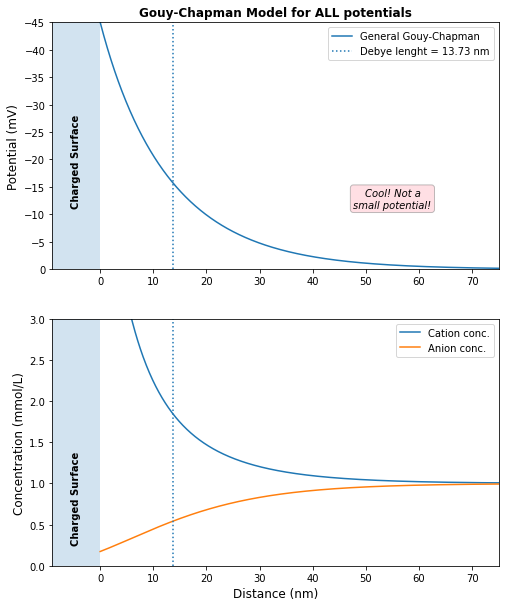

In [12]:
##################################################
##  Plot Manually 
##################################################
Surface__Potential  = -45   #mV
Electrolite__Ratio  = "1:1" #"2:2" or "3:3"
Salt__Concentration = -3    #log [mol/L]

plotGouyBig(Surface__Potential,Electrolite__Ratio,Salt__Concentration)